# **Self-Supervised Learning**
In the rapidly evolving landscape of machine learning, self-supervised learning has emerged as a powerful technique that enables models to learn from unlabeled data. This paradigm has gained significant attention due to its ability to leverage the inherent structure of the data to create supervisory signals, without the need for extensive human annotation. In this article, we will delve into the concept of self-supervised learning, explore its relevance in the current machine learning landscape, discuss its benefits and challenges, provide practical implementations using the widely-used Python libraries PyTorch, scikit-learn, and TensorFlow, and examine its applications in various domains.

**Introduction to Self-Supervised Learning**

Self-supervised learning is a type of unsupervised learning where the model learns to make predictions about the input data itself, using pretext tasks. These pretext tasks are designed in such a way that the model is forced to understand and capture the underlying patterns and structures of the data. Unlike supervised learning, which relies heavily on labeled data, self-supervised learning techniques can leverage large amounts of unlabeled data, making it particularly advantageous in scenarios where annotated data is scarce or expensive to obtain.

**Pretext Tasks in Self-Supervised Learning**

The key idea behind self-supervised learning is to enable the model to learn useful representations of the data without explicit human supervision. Pretext tasks can include predicting missing parts of an input, understanding the relative positions of different elements in the input, or solving jigsaw puzzles created from the data. By training on these pretext tasks, the model can develop a rich understanding of the data, which can be later leveraged for various downstream tasks.

# **Implementation Examples**
**Implementing Self-Supervised Learning in PyTorch**

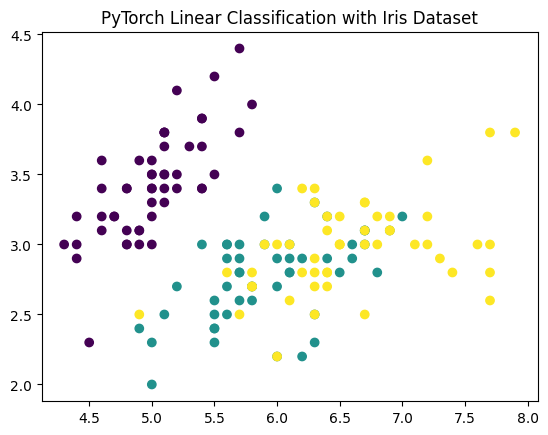

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# PyTorch Implementation with appropriate target labels
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using only the first two features for demonstration

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)  # Ensure the target is of type long for CrossEntropyLoss

# Define a simple linear model for classification
model = nn.Linear(2, 3)  # 3 classes in the Iris dataset
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
for epoch in range(100):
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('PyTorch Linear Classification with Iris Dataset')
plt.show()

**Implementing Self-Supervised Learning in scikit-learn**

Accuracy: 0.9


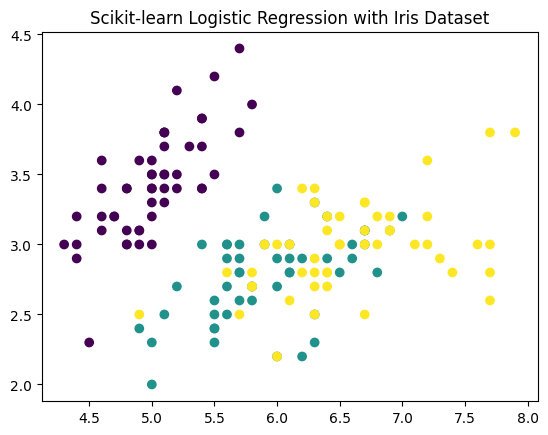

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Scikit-learn Implementation
# Loading the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Scikit-learn Logistic Regression with Iris Dataset')
plt.show()


**Implementing Self-Supervised Learning in TensorFlow**

5/5 [==============================] - 0s 3ms/step


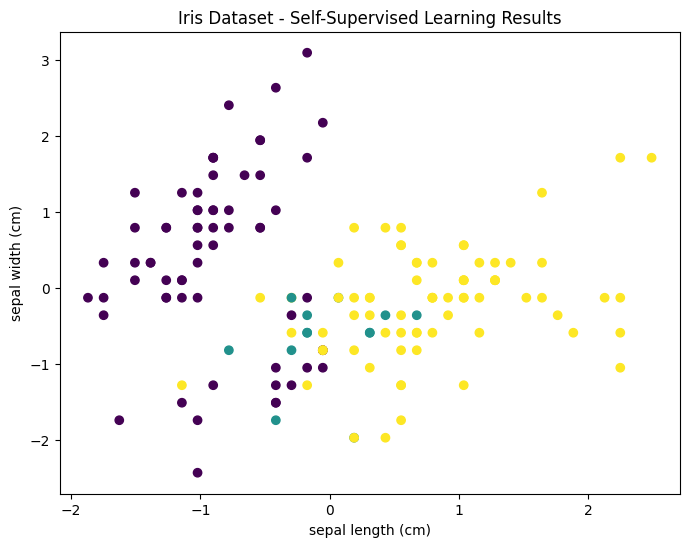

In [5]:
import tensorflow as tf
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define a simple self-supervised learning model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3)  # 3 classes in the Iris dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Obtain the model predictions
predictions = np.argmax(model.predict(X), axis=1)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.title('Iris Dataset - Self-Supervised Learning Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

**Benefits and Applications**

Self-supervised learning has several notable benefits. It allows models to learn from large amounts of readily available unlabeled data, which can significantly enhance their performance on downstream tasks. This technique can be particularly useful in natural language processing, computer vision, and various other domains where labeled data may be limited or costly to obtain.

**Applications of Self-Supervised Learning**

Self-supervised learning has found applications in various domains, including:
1. Natural Language Processing
2. Computer Vision
3. Speech Recognition
4. Anomaly Detection
5. Recommendation Systems

**Challenges and Future Directions**

While self-supervised learning has shown great promise, it also poses several challenges. Designing effective pretext tasks that encourage meaningful feature learning is a non-trivial task. Additionally, ensuring that the learned representations are transferable to downstream tasks remains an active area of research.

**Future Directions in Self-Supervised Learning**

In the future, the development of more sophisticated self-supervised learning techniques and the exploration of novel pretext tasks are expected to further enhance the capabilities of self-supervised models. Additionally, the integration of self-supervised learning with other learning paradigms, such as reinforcement learning, is a promising direction for advancing the field.

**Conclusion**

Self-supervised learning represents a groundbreaking approach in machine learning, enabling models to learn from unannotated data and develop comprehensive representations of the underlying data structure. In this article, we explored the fundamentals of self-supervised learning, provided practical implementations using PyTorch, scikit-learn, and TensorFlow, and discussed its applications and challenges. As the field continues to evolve, self-supervised learning is expected to play a pivotal role in advancing the capabilities of various machine learning models and applications.

**References**

1. Vincent Dumoulin, Ishmael Belghazi, Ben Poole, Alex Lamb, Martin Arjovsky, Olivier Mastropietro, and Aaron Courville. "Adversarially Learned Inference." arXiv preprint arXiv:1606.00704 (2016).
2.Mathilde Caron, Ishan Misra, Julien Mairal, Priya Goyal, Piotr Bojanowski, Armand Joulin. "Emerging Properties in Self-Supervised Vision Transformers." arXiv preprint arXiv:2104.14294 (2021).
3.David Ulyanov, Andrea Vedaldi, Victor Lempitsky. "Deep Image Prior." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2018.
